In [51]:
# data set
# https://www.kaggle.com/datasets/CooperUnion/cardataset

In [85]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from joblib import dump, load

In [53]:
# Define the file path
file_path = "data/car-features-msrp.csv"

# Read the csv file into a dataframe
df = pd.read_csv(file_path)

In [54]:
# Print the first 5 rows of the dataframe
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [55]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [56]:
# renaming columns name by make it consistent col_name
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [57]:
# extract text features
categorical_features = df.select_dtypes(exclude=np.number).columns
print(categorical_features)

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')


In [58]:
# renaming columns values to make it consistent & uniform i.e. ALL --> all
for col in categorical_features:
    df[col] = df[col].str.lower() #.str.replace(' ', '_')

In [59]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1 series m,2011,premium unleaded (required),335.0,6.0,manual,rear wheel drive,2.0,"factory tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1 series,2011,premium unleaded (required),300.0,6.0,manual,rear wheel drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1 series,2011,premium unleaded (required),300.0,6.0,manual,rear wheel drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1 series,2011,premium unleaded (required),230.0,6.0,manual,rear wheel drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1 series,2011,premium unleaded (required),230.0,6.0,manual,rear wheel drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [60]:
# remove null rows
df = df.dropna()

In [61]:
# how many null values for each variable
df.isnull().sum().sort_values(ascending=False)

make                 0
model                0
year                 0
engine_fuel_type     0
engine_hp            0
engine_cylinders     0
transmission_type    0
driven_wheels        0
number_of_doors      0
market_category      0
vehicle_size         0
vehicle_style        0
highway_mpg          0
city_mpg             0
popularity           0
msrp                 0
dtype: int64

In [62]:
# find all the columns that contain NaN values
df.columns[df.isnull().any()].tolist()

[]

In [63]:
# Select the features and the target variable
X = df[['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity']]
y = df['msrp']

In [64]:
# show categorical features
categorical_features

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [65]:
# Convert these columns to categorical features
X[categorical_features] = X[categorical_features].astype('category')

# Create dummies for these columns
X = pd.get_dummies(X, columns=categorical_features)

C:\Users\STC\AppData\Local\Temp\ipykernel_14520\957329769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[categorical_features] = X[categorical_features].astype('category')


In [66]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8084 entries, 0 to 11913
Columns: 872 entries, year to vehicle_style_wagon
dtypes: float64(3), int64(4), uint8(865)
memory usage: 7.2 MB


In [67]:
X.head()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,make_acura,make_alfa romeo,make_aston martin,...,vehicle_style_convertible,vehicle_style_convertible suv,vehicle_style_coupe,vehicle_style_crew cab pickup,vehicle_style_extended cab pickup,vehicle_style_passenger minivan,vehicle_style_passenger van,vehicle_style_regular cab pickup,vehicle_style_sedan,vehicle_style_wagon
0,2011,335.0,6.0,2.0,26,19,3916,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2011,300.0,6.0,2.0,28,19,3916,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2011,300.0,6.0,2.0,28,20,3916,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,2011,230.0,6.0,2.0,28,18,3916,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2011,230.0,6.0,2.0,28,18,3916,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [68]:
# Encode categorical variables using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
# Create and fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance using MSE and R2
mse = mean_squared_error(y_test, y_pred).round(3)
rmse = np.sqrt(mse).round(3)
r2 = r2_score(y_test, y_pred).round(3)

print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2: ", r2)

MSE:  172825796.936
RMSE:  13146.323
R2:  0.962


In [71]:
# # Define a list of algorithms
# algorithms = [DecisionTreeRegressor(), RandomForestRegressor(), KNeighborsRegressor(), 
#               SVR(), MLPRegressor()]

# # Define a list of names for the algorithms
# names = ["Decision Tree", "Random Forest", "K-Nearest Neighbors", 
#          "Support Vector Machine", "Neural Network"]

# # Loop through each algorithm and evaluate its performance
# for i in range(len(algorithms)):
#   # Create and fit the model
#   model = algorithms[i]
#   model.fit(X_train, y_train)

#   # Make predictions on the test set
#   y_pred = model.predict(X_test)

#   # Evaluate the model performance using MSE and R2
#   mse = mean_squared_error(y_test, y_pred)
#   rmse = np.sqrt(mse)
#   r2 = r2_score(y_test, y_pred)
#   print(names[i] + ":")
#   print("MSE: ", mse)
#   print("RMSE: ", rmse)
#   print("R2: ", r2)
#   print()

Decision Tree:
MSE:  263925272.3887227
RMSE:  16245.777063247011
R2:  0.9416225212420067

Random Forest:
MSE:  81874498.60558623
RMSE:  9048.45282938394
R2:  0.9818902268816103

K-Nearest Neighbors:
MSE:  582639451.7852072
RMSE:  24137.92558993434
R2:  0.871126315747195

Support Vector Machine:
MSE:  4732743531.104241
RMSE:  68794.93826659227
R2:  -0.04683281162684727

Neural Network:
MSE:  2182014925.873691
RMSE:  46712.04262150919
R2:  0.5173613772113375



C:\Users\STC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [77]:
# Define a function that tests all the algorithms and saves the scores
def test_algorithms():
  # Split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Define a list of algorithms
  algorithms = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), 
                KNeighborsRegressor(), SVR(), MLPRegressor(), XGBRegressor()]

  # Define a list of names for the algorithms
  names = ["Linear Regression", "Decision Tree", "Random Forest", 
           "K-Nearest Neighbors", "Support Vector Machine", "Neural Network", "XGBoost"]

  # Create an empty dictionary to store the scores
  scores = {}

  # Loop through each algorithm and evaluate its performance
  for i in range(len(algorithms)):
    # Create and fit the model
    model = algorithms[i]
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model performance using MSE and R2
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(names[i] + ":")
    print("MSE: ", mse)
    print("RMSE: ", rmse)
    print("R2: ", r2)
    print()

    # Save the scores in the dictionary
    scores[names[i]] = [mse, rmse, r2]

  # Convert the dictionary to a dataframe
  scores_df = pd.DataFrame.from_dict(scores, orient='index', columns=['MSE', 'RMSE', 'R2'])

  # best model
  best_model = min(scores, key=scores.get)
  print("Best Model: ", best_model)

  # Return the dataframe of scores
  return scores_df

In [78]:
# Call the function with the file path
test_algorithms()

Linear Regression:
MSE:  172825796.93818724
RMSE:  13146.322563294545
R2:  0.9617727616674295

Decision Tree:
MSE:  271505615.96012974
RMSE:  16477.427467906808
R2:  0.9399458294200642

Random Forest:
MSE:  96372760.68995763
RMSE:  9816.962905601591
R2:  0.9786833646542915

K-Nearest Neighbors:
MSE:  582639451.7852072
RMSE:  24137.92558993434
R2:  0.871126315747195

Support Vector Machine:
MSE:  4732743531.104241
RMSE:  68794.93826659227
R2:  -0.04683281162684727



C:\Users\STC\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network:
MSE:  2226562201.355757
RMSE:  47186.46205593038
R2:  0.5075079910439433

XGBoost:
MSE:  244747810.65057302
RMSE:  15644.417875094394
R2:  0.9458643729416126

Best Model:  Random Forest


,MSE,RMSE,R2
Linear Regression,1.728258e+08,13146.322563,0.961773
Decision Tree,2.715056e+08,16477.427468,0.939946
Random Forest,9.637276e+07,9816.962906,0.978683
K-Nearest Neighbors,5.826395e+08,24137.925590,0.871126
Support Vector Machine,4.732744e+09,68794.938267,-0.046833
Neural Network,2.226562e+09,47186.462056,0.507508
XGBoost,2.447478e+08,15644.417875,0.945864


In [ ]:
# Define a function to perform a grid search over the most important hyperparameters
def tune_random_forest():
  # Split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Define the random forest model
  model = RandomForestRegressor()

  # Define the grid of hyperparameters to search over
  param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
  }

  # Define the scoring functions for MSE and R2
  mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
  r2_scorer = make_scorer(r2_score)

  # Define the grid search object with 5-fold cross validation and the scoring functions
  grid_search = GridSearchCV(model, param_grid, cv=5, scoring={"mse": mse_scorer, "r2": r2_scorer},
                             refit="mse", n_jobs=-1)

  # Fit the grid search on the training data
  grid_search.fit(X_train, y_train)

  # Print the best parameters and scores
  print("Best parameters: ", grid_search.best_params_)
  print("Best MSE score: ", -grid_search.best_score_)
  print("Best R2 score: ", grid_search.cv_results_["mean_test_r2"][grid_search.best_index_])

  # Return the best estimator
  return grid_search.best_estimator_

In [82]:
# Call the function 
tune_random_forest()

C:\Users\STC\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\STC\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\STC\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegress

C:\Users\STC\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\STC\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\STC\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegress

C:\Users\STC\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\STC\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\STC\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegress

C:\Users\STC\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\STC\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\STC\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegress

KeyboardInterrupt: 

In [83]:
def createRandomForestAndPlot():
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a random forest model with the best parameters
    model = RandomForestRegressor(max_depth=None, max_features="sqrt", min_samples_leaf=1, min_samples_split=2, n_estimators=300)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model performance using MSE and R2
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print("MSE: ", mse)
    print("RMSE: ", rmse)
    print("R2: ", r2)

    # Plot the actual vs predicted values of MSRP
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual MSRP")
    plt.ylabel("Predicted MSRP")
    plt.title("Actual vs Predicted MSRP")
    plt.show()

    # Plot the distribution of the residuals
    residuals = y_test - y_pred
    plt.hist(residuals, bins=20)
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.title("Distribution of Residuals")
    plt.show()

    # Plot the feature importance of the model
    feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
    feature_importance.head(10).plot(kind="barh")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.title("Feature Importance of Random Forest Model")
    plt.show()

MSE:  115926235.33318031
RMSE:  10766.904631006086
R2:  0.9743583428771104


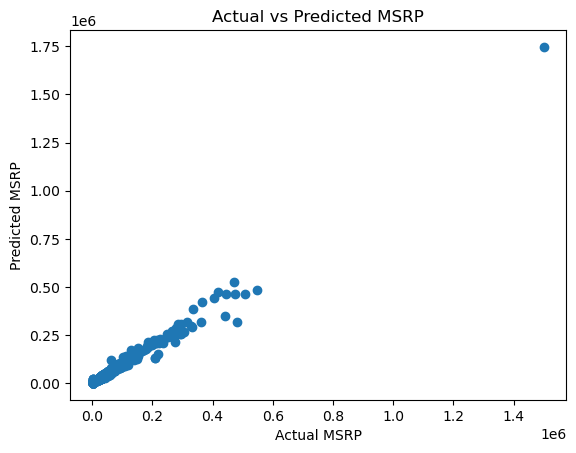

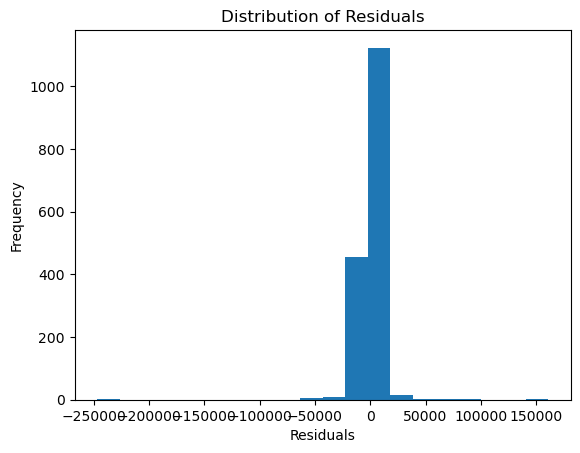

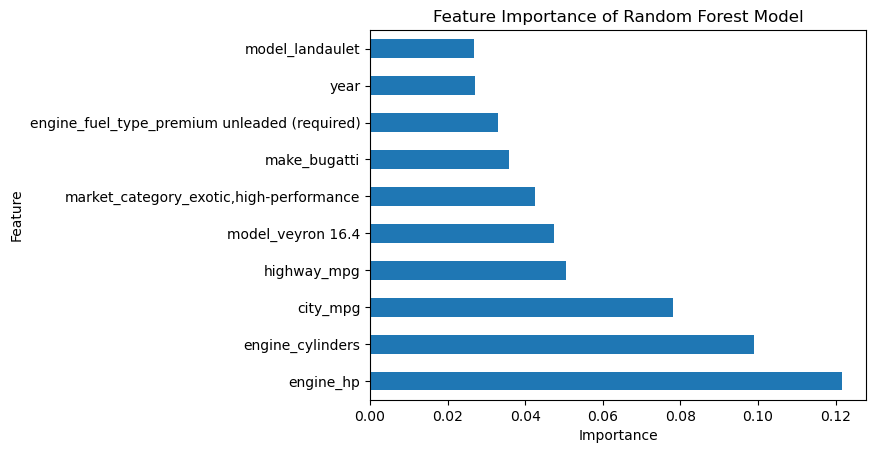

In [84]:
createRandomForestAndPlot()

In [88]:
# Save the model to a file
dump(model, "models/car-price-model.joblib")

# Load the model from a file
model = load("models/car-price-model.joblib")